<a href="https://colab.research.google.com/github/shmda/ZNAS-Kid/blob/main/BDA_Project_Machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **"Analyzing Marital Dynamics: Understanding Relationship Patterns among Divorced Couples"**



- Bawazier Najla Geis Junaid - 2017868 - jullienajla@gmail.com
- Shomida Roumhayaty - 2011978 - shomida.rhmalik@gmail.com
- Muhammad Amirul Asyraf bin Mohd Razli - 2013137 - amirowl171201@gmail.com
- Rafi Taufiqul Hafizh - 1927529 - rafi.taufiqul@gmail.com



**Content:**
1. **Data Science Questions**
2. **Methodology**
3. **Objectives**
4. **Code**:
-  **Importing Libraries**
- **Loading the dataset:** Load the data and feature selection
-  **Data Preprocessing:**
 - Dropping duplicates.
 - Remove the NaN values from the dataset
- **EDA**
- **Analysis**
- **Model Development**

**DATA SCIENCE QUESTIONS:**
1. Is there a correlation between the levels of candidness during discussions among couples and their shared values in trust? (Attribute 20,52,53,54)
2. Are there any differences in communication patterns between couples who have similar ideas about roles in marriage and those who do not? (Attribute 18,34,35,36)
3. What is the average level of similarity in goals, sense of entertainment, and dreams among couples?(Attribute 10,15,13)
4. Do couples who spend more time together have higher levels of agreement in their discussions? (Attribute 1,5)
5. Is there a significant difference in the levels of aggression during arguments based on the frequency of sudden discussions? (Attribute 36,39)
6. Is there a relationship between the level of agreement on how marriage should be and the level of agreement on roles in marriage? (Attribute 18,19)
7. Can we classify couples' communication patterns (calm or not calm) based on their aggressiveness during arguments and frequency of sudden discussions? (Attribute 31,37,39)
8. Is there a correlation between the level of enjoyment of holidays and the amount of quality time spent together as partners, considering their shared view of happiness? (Attribute 8,6,17)
9. What is the average level of understanding of each other's interests, inner world, and social life among couples? (Attribute 21,25,30)
10. Can we predict the likelihood of apologizing during arguments based on the calmness of discussion, the tendency to stay silent, and the ability to reset and correct discussions with a spouse? (Attributes 1, 37,45,3)
11. What is the distribution of couples' levels of aggression during arguments and their tendency to stay silent, considering the frequency of sudden discussions? (Attribute 31,35,39)




1. **Importing Libraries**

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq> /dev/null

In [ ]:
!wget -q https://dlcdn.apache.org/spark/spark-3.3.2/spark-3.3.2-bin-hadoop3.tgz

In [ ]:
!tar xf spark-3.3.2-bin-hadoop3.tgz

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.2-bin-hadoop3"

In [ ]:
!pip install -q findspark
import findspark
findspark.init()
findspark.find()

'/content/spark-3.3.2-bin-hadoop3'

In [ ]:
from pyspark.sql.functions import col

2. **Load the Data**
- selecting only features that is related to the analysis

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('Divorce').getOrCreate()

#loading the divorce dataset
df = spark.read.csv('divorce.csv', header=True, inferSchema=True)
df = df.select("Atr1", "Atr3", "Atr5", "Atr6", "Atr8", "Atr10", "Atr13", "Atr15", "Atr17", "Atr18", "Atr19", "Atr20", "Atr21", "Atr25", "Atr30", "Atr31", "Atr34", "Atr35", "Atr36", "Atr37", "Atr39", "Atr45", "Atr52", "Atr53", "Atr54", "Class")



df.show()


+----+----+----+----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|Atr1|Atr3|Atr5|Atr6|Atr8|Atr10|Atr13|Atr15|Atr17|Atr18|Atr19|Atr20|Atr21|Atr25|Atr30|Atr31|Atr34|Atr35|Atr36|Atr37|Atr39|Atr45|Atr52|Atr53|Atr54|Class|
+----+----+----+----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   2|   4|   0|   0|   0|    0|    1|    0|    0|    0|    0|    1|    0|    0|    1|    1|    2|    0|    1|    2|    3|    3|    3|    2|    1|    1|
|   4|   4|   4|   0|   4|    4|    4|    4|    4|    4|    3|    2|    1|    2|    1|    0|    3|    0|    2|    3|    2|    2|    4|    2|    2|    1|
|   2|   2|   1|   3|   1|    2|    2|    3|    3|    3|    3|    2|    1|    2|    2|    3|    1|    1|    1|    2|    3|    2|    2|    2|    2|    1|
|   3|   3|   3|   3|   3|    3|    3|    3|    3|    3|    3|    4|    1|    2|  

In [ ]:
from pyspark.sql.functions import col, sum

# Count total null values for each column in all dataset
df_null = df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])

df_null.show()



+----+----+----+----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|Atr1|Atr3|Atr5|Atr6|Atr8|Atr10|Atr13|Atr15|Atr17|Atr18|Atr19|Atr20|Atr21|Atr25|Atr30|Atr31|Atr34|Atr35|Atr36|Atr37|Atr39|Atr45|Atr52|Atr53|Atr54|Class|
+----+----+----+----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   0|   0|   0|   0|   0|    0|    0|    0|    0|    0|    0|    0|    0|    0|    0|    0|    0|    0|    0|    0|    0|    0|    0|    0|    0|    0|
+----+----+----+----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+



In [ ]:
df = df.dropna()

<font color="" size=+1.0><b>- checking for duplicate values</b></font>

In [ ]:
df_duplicate = df.groupBy(df.columns).count().filter(col('count') > 1).count()

# Print the number of duplicated rows
print("There are {} duplicated rows in the dataset.".format(df_duplicate))

# Drop duplicates and get the new row count
df = df.dropDuplicates()
row_count = df.count()

# Print the number of rows after dropping duplicates
print("Number of rows after dropping duplicates is {}.".format(row_count))

There are 16 duplicated rows in the dataset.
Number of rows after dropping duplicates is 148.


<font color="" size=+1.0><b>EDA</b></font>

In [ ]:
from pyspark.sql.functions import col

# Define the mapping between current names and new names
attribute_mapping = {
    "Atr1": "Apology_Termination",
    "Atr3": "Revisiting_Discussions",
    "Atr5": "Special_Time",
    "Atr6": "Time_Constraints",
    "Atr8": "Enjoyable_Holidays",
    "Atr10": "Shared_Goals",
    "Atr13": "Similar_Entertainment",
    "Atr15": "Harmonious_Dreams",
    "Atr17": "Shared_Happiness_Views",
    "Atr18": "Similar_Marriage_Ideas",
    "Atr19": "Similar_Role_Ideas",
    "Atr20": "Trust_Values",
    "Atr21": "Partner_Preferences",
    "Atr25": "Inner_World_Knowledge",
    "Atr30": "Partner_Friends",
    "Atr31": "Aggressive_Arguments",
    "Atr34": "Offensive_Expressions",
    "Atr35": "Insulting_Behavior",
    "Atr36": "Humiliating_Discussions",
    "Atr37": "Calmless_Discussions",
    "Atr39": "Sudden_Discussions",
    "Atr45": "Prefer_Silence",
    "Atr52": "Partner_Inadequacy",
    "Atr53": "Reminder_Inadequacy",
    "Atr54": "Fearless_Incompetence"
}

# Rename the attributes in the dataframe
for current_name, new_name in attribute_mapping.items():
    df = df.withColumnRenamed(current_name, new_name)

# Show the updated dataframe
df.show()


+-------------------+----------------------+------------+----------------+------------------+------------+---------------------+-----------------+----------------------+----------------------+------------------+------------+-------------------+---------------------+---------------+--------------------+---------------------+------------------+-----------------------+--------------------+------------------+--------------+------------------+-------------------+---------------------+-----+
|Apology_Termination|Revisiting_Discussions|Special_Time|Time_Constraints|Enjoyable_Holidays|Shared_Goals|Similar_Entertainment|Harmonious_Dreams|Shared_Happiness_Views|Similar_Marriage_Ideas|Similar_Role_Ideas|Trust_Values|Partner_Preferences|Inner_World_Knowledge|Partner_Friends|Aggressive_Arguments|Offensive_Expressions|Insulting_Behavior|Humiliating_Discussions|Calmless_Discussions|Sudden_Discussions|Prefer_Silence|Partner_Inadequacy|Reminder_Inadequacy|Fearless_Incompetence|Class|
+-----------------

+--------+-----+
| Divorce|count|
+--------+-----+
| Married|   64|
|divorced|   84|
+--------+-----+



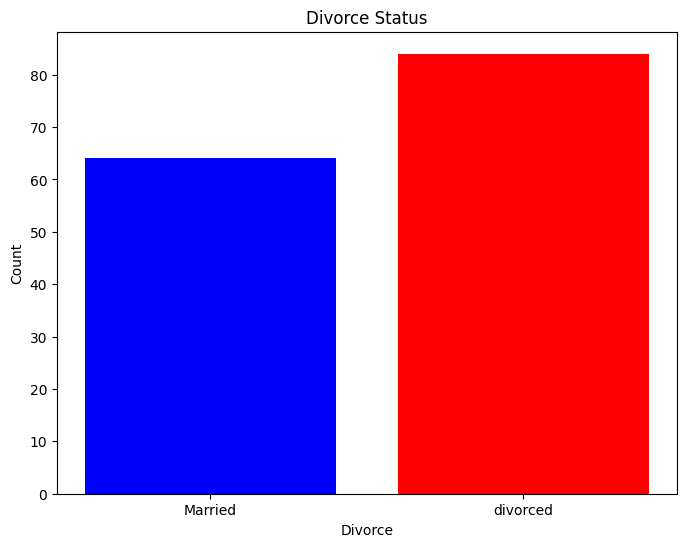

In [ ]:
from pyspark.sql.functions import count, when
import matplotlib.pyplot as plt

# Create a new column 'Divorce' based on 'Class' values
df = df.withColumn('Divorce', when(df['Class'] == 1, 'Married').otherwise('divorced'))

# Group the DataFrame by 'Class'
divorce_counts = df.groupBy('Divorce').agg(count('*').alias('count')).orderBy('Divorce')
divorce_counts.show()

# Convert the result to a Pandas DataFrame for plotting
divorce_counts_pd = divorce_counts.toPandas()


# Create a count plot with different colors for bars
plt.figure(figsize=(8, 6))
colors = ['blue', 'red']
plt.bar(divorce_counts_pd['Divorce'], divorce_counts_pd['count'], color=colors)
plt.title('Divorce Status')
plt.xlabel('Divorce')
plt.ylabel('Count')
plt.show()


**MODEL DEVELOPMENT**

1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Convert PySpark DataFrame to pandas DataFrame
pandas_df = df.toPandas()

# Split the data into features and labels
X = pandas_df.iloc[:, :-1]  # Features (all columns except the last one)
y = pandas_df.iloc[:, -1]  # Labels (last column)

# Map the class labels to binary values
y = y.map({'Married': 1, 'divorced': 0})  # Replace 'Married' with the positive class label


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create a logistic regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics and confusion matrix
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", confusion_mat)


Accuracy: 0.9333333333333333
Precision: 1.0
Recall: 0.8181818181818182
F1-score: 0.9
Confusion Matrix:
 [[19  0]
 [ 2  9]]


2. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Convert PySpark DataFrame to pandas DataFrame
pandas_df = df.toPandas()

# Split the data into features and labels
X = pandas_df.iloc[:, :-1]  # Features (all columns except the last one)
y = pandas_df.iloc[:, -1]  # Labels (last column)

# Map the class labels to binary values
y = y.map({'Married': 1, 'divorced': 0})  # Replace 'Married' with the positive class label

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
model = DecisionTreeClassifier()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics and confusion matrix
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", confusion_mat)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Confusion Matrix:
 [[19  0]
 [ 0 11]]


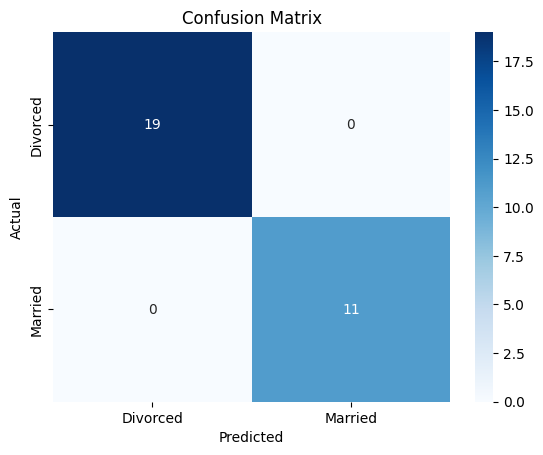

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(confusion_mat, annot=True, cmap="Blues", fmt="d")

# Add labels, title, and axis ticks
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.xticks([0.5, 1.5], ['Divorced', 'Married'])
plt.yticks([0.5, 1.5], ['Divorced', 'Married'])

# Show the plot
plt.show()

3. KNN

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import SparkSession
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# Assuming your Spark DataFrame has columns 'feature1', 'feature2', ..., 'Class'
# Selecting all columns except 'Class' as features
feature_cols = df.columns[:-1]  # Excluding the last column ('Class')
assembler = VectorAssembler(inputCols=feature_cols, outputCol='features')

# Transform the DataFrame using the VectorAssembler
feature_vector = assembler.transform(df).select('features', 'Class')

# Convert the DataFrame to a Pandas DataFrame for scikit-learn compatibility
pandas_df = feature_vector.toPandas()

# Split the data into training and testing sets
training_data, testing_data = pandas_df.sample(frac=0.7, random_state=42), pandas_df.sample(frac=0.3, random_state=42)

# Extract the features and labels from the Pandas DataFrames
X_train, y_train = training_data['features'].tolist(), training_data['Class'].tolist()
X_test, y_test = testing_data['features'].tolist(), testing_data['Class'].tolist()

# Create a KNN classifier
k = 5  # Set the value of k for KNN
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
confusion_mat = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics and confusion matrix
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print(confusion_mat)


Accuracy: 0.9318181818181818
F1-score: 0.9289449680754028
Precision: 0.9378342245989305
Recall: 0.9318181818181818
Confusion Matrix:
[[31  0]
 [ 3 10]]


4. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Convert PySpark DataFrame to pandas DataFrame
pandas_df = df.toPandas()

# Split the data into features and labels
X = pandas_df.iloc[:, :-1]  # Features (all columns except the last one)
y = pandas_df.iloc[:, -1]  # Labels (last column)

# Map the class labels to binary values
y = y.map({'Married': 1, 'divorced': 0})  # Replace 'Married' with the positive class label


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
model = RandomForestClassifier()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics and confusion matrix
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", confusion_mat)


Accuracy: 0.9333333333333333
Precision: 1.0
Recall: 0.8181818181818182
F1-score: 0.9
Confusion Matrix:
 [[19  0]
 [ 2  9]]


5. SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Convert PySpark DataFrame to pandas DataFrame
pandas_df = df.toPandas()

# Split the data into features and labels
X = pandas_df.iloc[:, :-1]  # Features (all columns except the last one)
y = pandas_df.iloc[:, -1]  # Labels (last column)

# Map the class labels to binary values
y = y.map({'Married': 1, 'divorced': 0})  # Replace 'Married' with the positive class label


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
model = SVC()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics and confusion matrix
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", confusion_mat)


Accuracy: 0.9333333333333333
Precision: 1.0
Recall: 0.8181818181818182
F1-score: 0.9
Confusion Matrix:
 [[19  0]
 [ 2  9]]


Model visualization

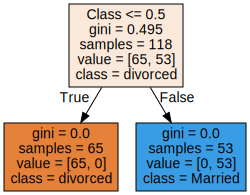

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn import tree
import graphviz

# Convert PySpark DataFrame to pandas DataFrame
pandas_df = df.toPandas()

# Split the data into features and labels
X = pandas_df.iloc[:, :-1]  # Features (all columns except the last one)
y = pandas_df.iloc[:, -1]  # Labels (last column)

# Map the class labels to binary values
y = y.map({'Married': 1, 'divorced': 0})  # Replace 'Married' with the positive class label

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
model = DecisionTreeClassifier()

# Fit the model on the training data
model.fit(X_train, y_train)

# Visualize the decision tree
dot_data = tree.export_graphviz(model, out_file=None, feature_names=X.columns, class_names=['divorced', 'Married'], filled=True)
graph = graphviz.Source(dot_data)

# Display the decision tree in Colab
graph
